In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import sklearn as sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import numpy as np

In [2]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
penguins_train, penguins_test = train_test_split(penguins.fillna(value=1).dropna(), test_size=0.3, random_state=42, stratify=penguins['species'])
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [4]:
features= ['bill_length_mm', 'bill_depth_mm']
dt = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(penguins[features], penguins['species'])

DecisionTreeClassifier(max_depth=3)

In [5]:
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

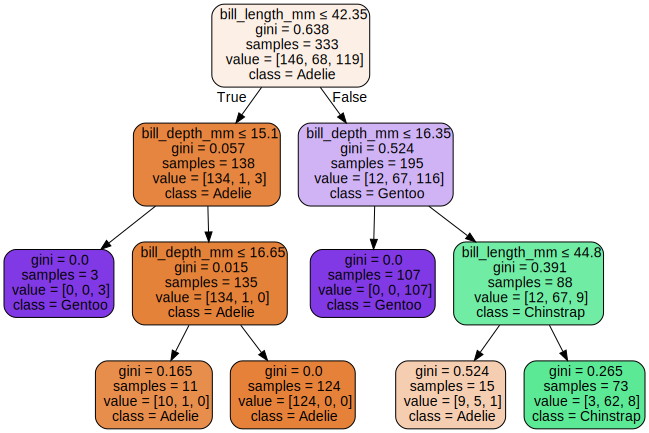

In [7]:
plot_tree_classification(dt, features, np.sort(penguins.species.unique()))

!!!!!!!!!!!!!!!! Use your decision tree model to make predictions for both the train and test set.

In [10]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [11]:
predictionsOnTrainset = dt.predict(penguins_train[features])
predictionsOnTestset = dt.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9356223175965666
Accuracy on test set 0.97
